In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Shifting all data from xls format into cleaned up df
lebron_reg_datalist = pd.read_html("data_files/Lebron_Regular_Season.xls")
lebron_reg_data = ""
for i in lebron_reg_datalist:
    lebron_reg_data = i
lebron_reg_data = lebron_reg_data[:22]


jordan_reg_datalist = pd.read_html("data_files/Jordan_Regular_Season.xls")
jordan_reg_data = ""
for i in jordan_reg_datalist:
    jordan_reg_data = i
jordan_reg_data = jordan_reg_data[:19]

lebron_reg_data.columns


Index(['Season', 'Age', 'Team', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')

In [10]:
#Extracting key stats "Points, Assist, Rebounds, Steals, Blocks" for both players
keystats_lebron = lebron_reg_data[["Age","PTS","AST","TRB","BLK","STL"]]
keystats_lebron = keystats_lebron.rename(columns={"PTS": "Lebron_PTS","AST": "Lebron_AST","TRB": "Lebron_TRB","BLK": "Lebron_BLK","STL": "Lebron_STL" })
keystats_jordan = jordan_reg_data[["Age","PTS","AST","TRB","BLK","STL"]]
keystats_jordan = keystats_jordan.rename(columns={"PTS": "Jordan_PTS","AST": "Jordan_AST","TRB": "Jordan_TRB","BLK": "Jordan_BLK","STL": "Jordan_STL" })
keystats_both = keystats_lebron.set_index('Age').join(keystats_jordan.set_index('Age'))
keystats_both = keystats_both.rename_axis('Age').reset_index()

keystats_both = keystats_both.apply(pd.to_numeric, errors='coerce')
print(keystats_both)



    Age  Lebron_PTS  Lebron_AST  Lebron_TRB  Lebron_BLK  Lebron_STL  \
0    19        20.9         5.9         5.5         0.7         1.6   
1    20        27.2         7.2         7.4         0.7         2.2   
2    21        31.4         6.6         7.0         0.8         1.6   
3    22        27.3         6.0         6.7         0.7         1.6   
4    23        30.0         7.2         7.9         1.1         1.8   
5    24        28.4         7.2         7.6         1.1         1.7   
6    25        29.7         8.6         7.3         1.0         1.6   
7    26        26.7         7.0         7.5         0.6         1.6   
8    27        27.1         6.2         7.9         0.8         1.9   
9    28        26.8         7.3         8.0         0.9         1.7   
10   29        27.1         6.3         6.9         0.3         1.6   
11   30        25.3         7.4         6.0         0.7         1.6   
12   31        25.3         6.8         7.4         0.6         1.4   
13   3

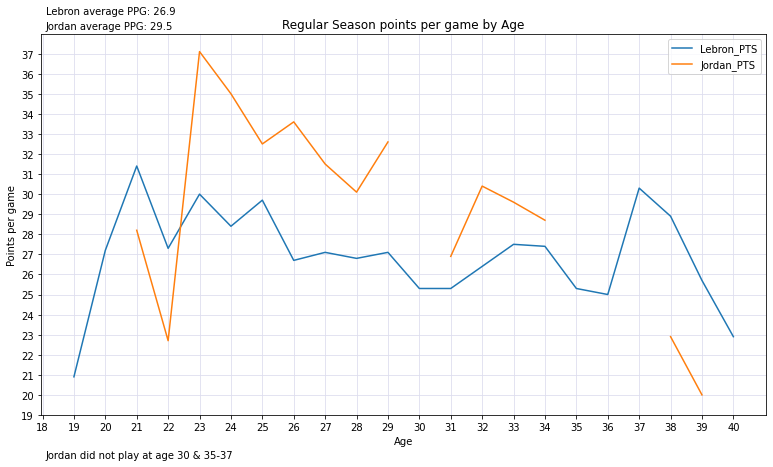

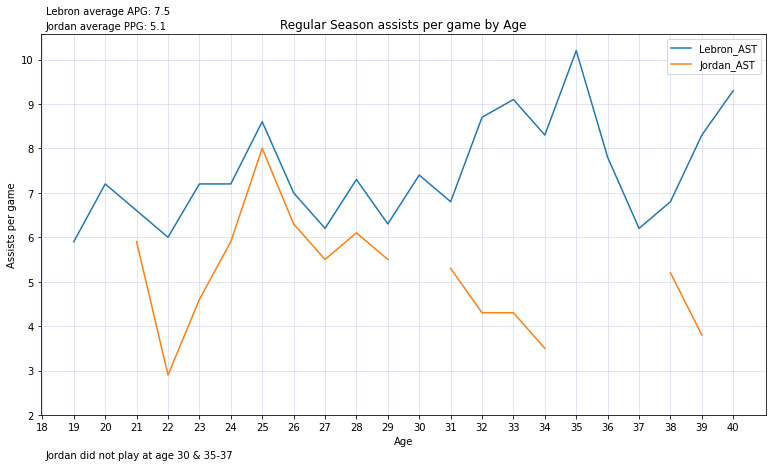

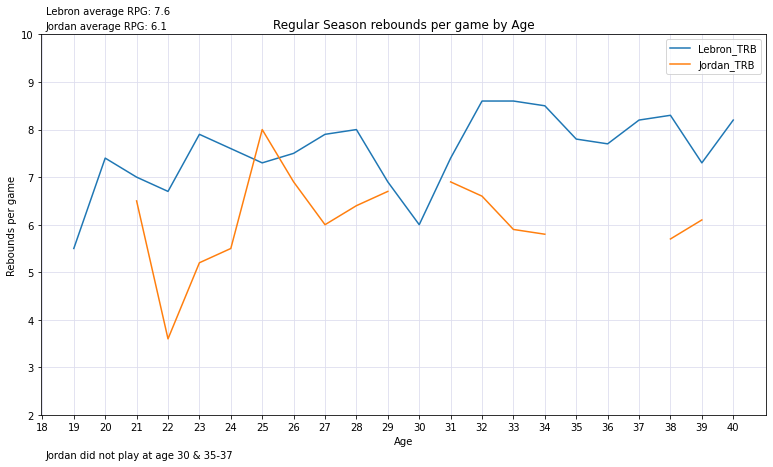

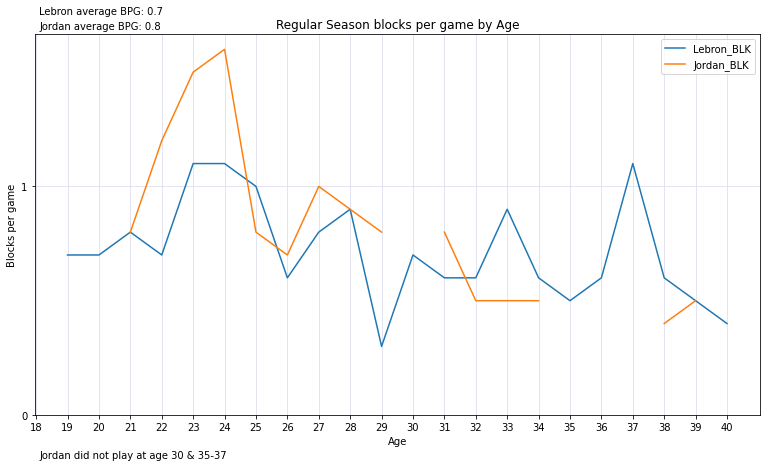

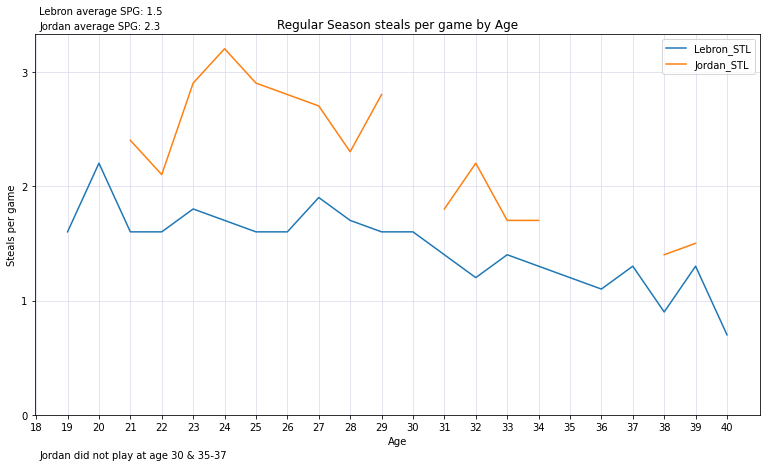

In [11]:
# Plot Points per game into line chart

keystats_both.plot(x='Age', y=['Lebron_PTS', 'Jordan_PTS'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 19
ymax = 38
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Points per game')
plt.title('Regular Season points per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average PPG: {round(keystats_both.Lebron_PTS.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average PPG: {round(keystats_both.Jordan_PTS.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()

# Plot AST per game into line chart
keystats_both.plot(x='Age', y=['Lebron_AST', 'Jordan_AST'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 2
ymax = 11
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Assists per game')
plt.title('Regular Season assists per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average APG: {round(keystats_both.Lebron_AST.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average PPG: {round(keystats_both.Jordan_AST.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Rebounds per game into line chart
keystats_both.plot(x='Age', y=['Lebron_TRB', 'Jordan_TRB'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 2
ymax = 11
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Rebounds per game')
plt.title('Regular Season rebounds per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average RPG: {round(keystats_both.Lebron_TRB.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average RPG: {round(keystats_both.Jordan_TRB.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Blocks per game into line chart
keystats_both.plot(x='Age', y=['Lebron_BLK', 'Jordan_BLK'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 0
ymax = 2
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Blocks per game')
plt.title('Regular Season blocks per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average BPG: {round(keystats_both.Lebron_BLK.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average BPG: {round(keystats_both.Jordan_BLK.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Steals per game into line chart
keystats_both.plot(x='Age', y=['Lebron_STL', 'Jordan_STL'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 0
ymax = 4
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Steals per game')
plt.title('Regular Season steals per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average SPG: {round(keystats_both.Lebron_STL.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average SPG: {round(keystats_both.Jordan_STL.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()


In [12]:
# However, as years go by, the league has became more offensive so unlike other comparisons out there in the world, we want to cover the league averages as well.
# So basically, we want to use league average and then use each Player's stats per game and divide by league average to determine and then compare each player's coefficient.abs
#Shifting all data from xls format into cleaned up df
league_avg_datalist = pd.read_excel("data_files/league_average.xlsx")
league_avg_datalist = league_avg_datalist.iloc[::-1]

league_avg_datalist = league_avg_datalist.tail(41)
league_avg_datalist = league_avg_datalist[["Season","PTS","AST","TRB","STL","BLK"]]
league_avg_datalist = league_avg_datalist.reset_index(drop=True)
league_avg_datalist.head(10)

,Season,PTS,AST,TRB,STL,BLK
0,1984-85,110.8,26.3,43.5,8.5,5.3
1,1985-86,110.2,26.0,43.6,8.8,5.3
2,1986-87,109.9,26.0,44.0,8.6,5.5
3,1987-88,108.2,25.8,43.4,8.5,5.4
4,1988-89,109.2,25.6,43.9,9.1,5.3
5,1989-90,107.0,24.9,43.1,8.5,5.1
6,1990-91,106.3,24.7,43.3,8.6,5.3
7,1991-92,105.3,24.5,43.7,8.6,5.5
8,1992-93,105.3,24.7,43.1,8.6,5.2
9,1993-94,101.5,24.4,43.0,8.9,5.2


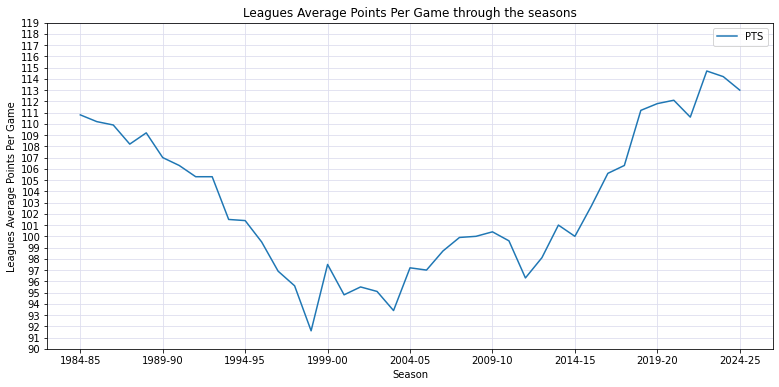

In [ ]:
# League averages by numbers (Just Average League PPG by seasons)
league_avg_datalist.plot(x='Season', y=['PTS'], figsize=(13,6))
ymin = 90
ymax = 120
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Season')
plt.ylabel('Leagues Average Points Per Game')
plt.title('Leagues Average Points Per Game through the seasons')
plt.grid(color='#ddddee')
plt.show()

In [6]:

# Joining jordan table with leagur average table using season key to then find corff of jordan point to leagues avg using division of values
jordan_reg_data = jordan_reg_data[["Season","Age","PTS","AST","TRB","STL","BLK"]]
jordan_reg_data = jordan_reg_data.rename(columns={"PTS": "Jordan_PTS","AST": "Jordan_AST","TRB": "Jordan_TRB","BLK": "Jordan_BLK","STL": "Jordan_STL" })
jordan_reg_data.iloc[:, 1:] = jordan_reg_data.iloc[:, 1:].applymap(lambda x: pd.to_numeric(x, errors='coerce'))

league_avg_datalist_84_03 = league_avg_datalist.iloc[:19]
league_avg_datalist_84_03 = league_avg_datalist_84_03.copy()
league_avg_datalist_84_03.iloc[:, 1:] = ( league_avg_datalist_84_03.iloc[:, 1:].applymap(lambda x: pd.to_numeric(x, errors='coerce')))

jordan_reg_league_data = jordan_reg_data.join(league_avg_datalist_84_03.set_index('Season'), on='Season')
jordan_reg_league_data[['Jordan_PTS_coeff', 'Jordan_AST_coeff', 'Jordan_TRB_coeff', 'Jordan_STL_coeff', 'Jordan_BLK_coeff']]= (jordan_reg_league_data[['Jordan_PTS', 'Jordan_AST', 'Jordan_TRB', 'Jordan_STL', 'Jordan_BLK']].div(jordan_reg_league_data[['PTS', 'AST', 'TRB', 'STL', 'BLK']].values))

jordan_reg_league_data = jordan_reg_league_data.infer_objects()
jordan_reg_league_data['Age'] =  jordan_reg_league_data['Age'].astype(str)
jordan_reg_league_data.loc[:,'Jordan_PTS_coeff':] = jordan_reg_league_data.loc[:,'Jordan_PTS_coeff':].round(2)

# Grab only the coeff from lebron_reg_league_data (For reference)
jordan_coeff = jordan_reg_league_data[['Age', 'Jordan_PTS_coeff', 'Jordan_AST_coeff', 'Jordan_TRB_coeff', 'Jordan_STL_coeff', 'Jordan_BLK_coeff',]]
jordan_coeff.head(5)

,Age,Jordan_PTS_coeff,Jordan_AST_coeff,Jordan_TRB_coeff,Jordan_STL_coeff,Jordan_BLK_coeff
0,21.0,0.25,0.22,0.15,0.28,0.15
1,22.0,0.21,0.11,0.08,0.24,0.23
2,23.0,0.34,0.18,0.12,0.34,0.27
3,24.0,0.32,0.23,0.13,0.38,0.30
4,25.0,0.30,0.31,0.18,0.32,0.15


In [7]:

# Joining Lebron table with leagur average table using season key to then find corff of lebron point to leagues avg using division of values
lebron_reg_data = lebron_reg_data[["Season","Age","PTS","AST","TRB","STL","BLK"]]
lebron_reg_data = lebron_reg_data.rename(columns={"PTS": "Lebron_PTS","AST": "Lebron_AST","TRB": "Lebron_TRB","BLK": "Lebron_BLK","STL": "Lebron_STL" })
lebron_reg_data.iloc[:, 1:] = lebron_reg_data.iloc[:, 1:].applymap(lambda x: pd.to_numeric(x, errors='coerce'))

league_avg_datalist_03_25 = league_avg_datalist.iloc[19:]
league_avg_datalist_03_25 = league_avg_datalist_03_25.copy()
league_avg_datalist_03_25.iloc[:, 1:] = ( league_avg_datalist_03_25.iloc[:, 1:].applymap(lambda x: pd.to_numeric(x, errors='coerce')))

lebron_reg_league_data = lebron_reg_data.join(league_avg_datalist_03_25.set_index('Season'), on='Season')
lebron_reg_league_data[['Lebron_PTS_coeff', 'Lebron_AST_coeff', 'Lebron_TRB_coeff', 'Lebron_STL_coeff', 'Lebron_BLK_coeff']]= (lebron_reg_league_data[['Lebron_PTS', 'Lebron_AST', 'Lebron_TRB', 'Lebron_STL', 'Lebron_BLK']].div(lebron_reg_league_data[['PTS', 'AST', 'TRB', 'STL', 'BLK']].values))

lebron_reg_league_data = lebron_reg_league_data.infer_objects()
lebron_reg_league_data['Age'] =  lebron_reg_league_data['Age'].astype(str)
lebron_reg_league_data.loc[:,'Lebron_PTS_coeff':] = lebron_reg_league_data.loc[:,'Lebron_PTS_coeff':].round(2)

# Grab only the coeff from lebron_reg_league_data (For reference)
lebron_coeff = lebron_reg_league_data[['Age', 'Lebron_PTS_coeff', 'Lebron_AST_coeff', 'Lebron_TRB_coeff', 'Lebron_STL_coeff', 'Lebron_BLK_coeff',]]
lebron_coeff.head(5)

,Age,Lebron_PTS_coeff,Lebron_AST_coeff,Lebron_TRB_coeff,Lebron_STL_coeff,Lebron_BLK_coeff
0,19.0,0.22,0.28,0.13,0.20,0.14
1,20.0,0.28,0.34,0.18,0.29,0.14
2,21.0,0.32,0.32,0.17,0.22,0.17
3,22.0,0.28,0.28,0.16,0.22,0.15
4,23.0,0.30,0.33,0.19,0.25,0.23


In [8]:
# Merge the coefficients using age as key
player_coefficient = lebron_coeff.set_index('Age').join(jordan_coeff.set_index('Age'))
player_coefficient = player_coefficient.reset_index()

# player_coefficient['Age'] = player_coefficient['Age'].round()\
player_coefficient['Age'] = pd.to_numeric(player_coefficient['Age'], errors='coerce').round()
player_coefficient


,Age,Lebron_PTS_coeff,Lebron_AST_coeff,Lebron_TRB_coeff,Lebron_STL_coeff,Lebron_BLK_coeff,Jordan_PTS_coeff,Jordan_AST_coeff,Jordan_TRB_coeff,Jordan_STL_coeff,Jordan_BLK_coeff
0,19.0,0.22,0.28,0.13,0.20,0.14,NaN,NaN,NaN,NaN,NaN
1,20.0,0.28,0.34,0.18,0.29,0.14,NaN,NaN,NaN,NaN,NaN
2,21.0,0.32,0.32,0.17,0.22,0.17,0.25,0.22,0.15,0.28,0.15
3,22.0,0.28,0.28,0.16,0.22,0.15,0.21,0.11,0.08,0.24,0.23
4,23.0,0.30,0.33,0.19,0.25,0.23,0.34,0.18,0.12,0.34,0.27
5,24.0,0.28,0.34,0.18,0.23,0.23,0.32,0.23,0.13,0.38,0.30
6,25.0,0.30,0.41,0.18,0.22,0.20,0.30,0.31,0.18,0.32,0.15
7,26.0,0.27,0.33,0.18,0.22,0.12,0.31,0.25,0.16,0.33,0.14
8,27.0,0.28,0.30,0.19,0.25,0.16,0.30,0.22,0.14,0.31,0.19
9,28.0,0.27,0.33,0.19,0.22,0.18,0.29,0.25,0.15,0.27,0.16


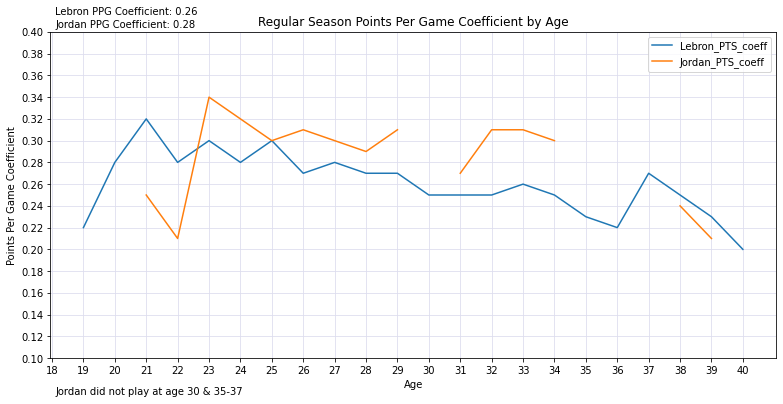

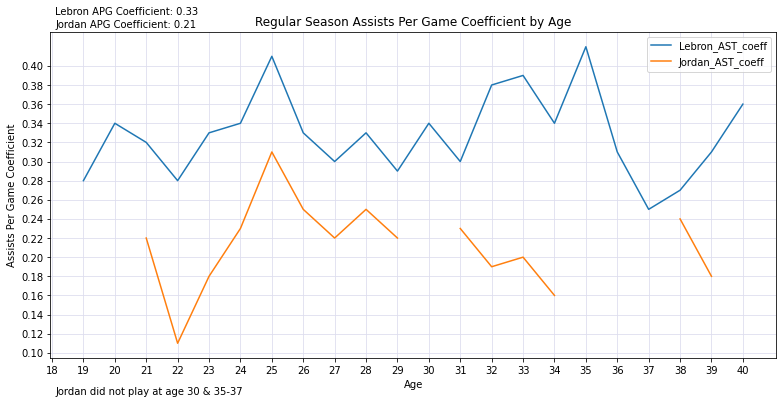

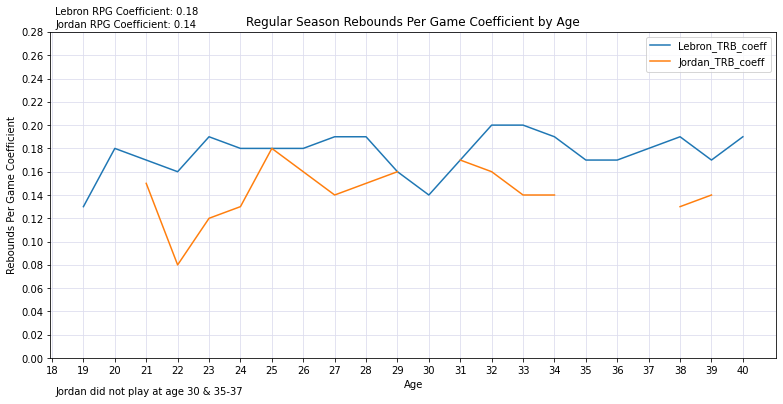

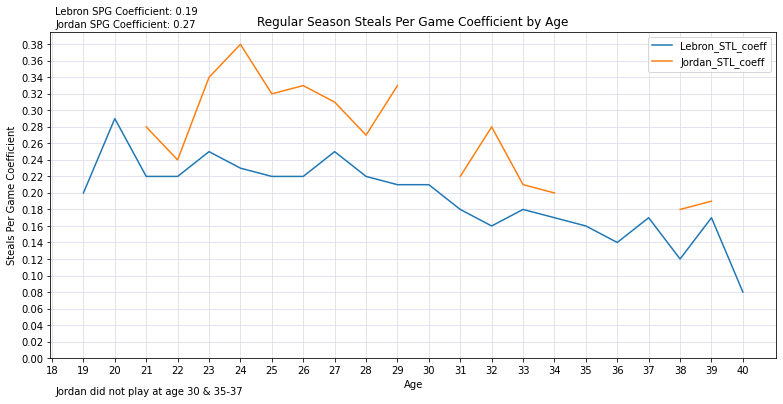

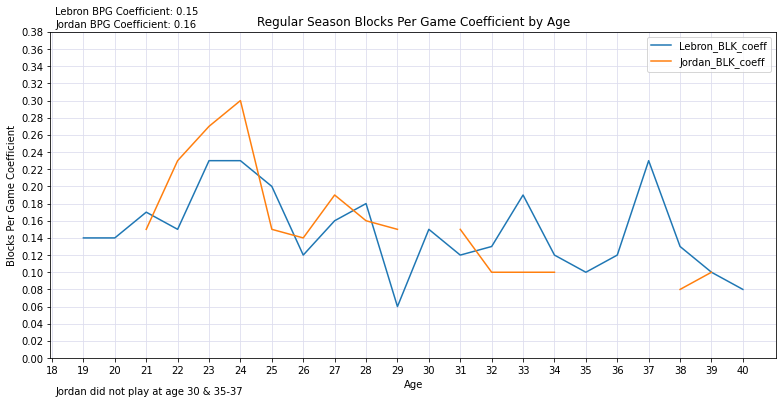

In [18]:
# Plot Points per game coefficients into line chart (Coefficient = Player PPG / League PPG)
player_coefficient.plot(x='Age', y=['Lebron_PTS_coeff', 'Jordan_PTS_coeff'], figsize=(13,6))
plt.xticks(np.arange(18, 41, step=1))
ymin = 0.1
ymax = 0.4
plt.yticks(np.arange(ymin, ymax, step=0.02))
plt.xlabel('Age')
plt.ylabel('Points Per Game Coefficient')
plt.title('Regular Season Points Per Game Coefficient by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron PPG Coefficient: {round(player_coefficient.Lebron_PTS_coeff.mean(),2)}")
plt.figtext(0.13, 0.89, f"Jordan PPG Coefficient: {round(player_coefficient.Jordan_PTS_coeff.mean(),2)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Assists per game coefficients into line chart (Coefficient = Player APG / League APG)
player_coefficient.plot(x='Age', y=['Lebron_AST_coeff', 'Jordan_AST_coeff'], figsize=(13,6))
plt.xticks(np.arange(18, 41, step=1))
ymin = 0.1
ymax = 0.4
plt.yticks(np.arange(ymin, ymax, step=0.02))
plt.xlabel('Age')
plt.ylabel('Assists Per Game Coefficient')
plt.title('Regular Season Assists Per Game Coefficient by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron APG Coefficient: {round(player_coefficient.Lebron_AST_coeff.mean(),2)}")
plt.figtext(0.13, 0.89, f"Jordan APG Coefficient: {round(player_coefficient.Jordan_AST_coeff.mean(),2)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Rebounds per game coefficients into line chart (Coefficient = Player RPG / League RPG)
player_coefficient.plot(x='Age', y=['Lebron_TRB_coeff', 'Jordan_TRB_coeff'], figsize=(13,6))
plt.xticks(np.arange(18, 41, step=1))
ymin = 0
ymax = 0.3
plt.yticks(np.arange(ymin, ymax, step=0.02))
plt.xlabel('Age')
plt.ylabel('Rebounds Per Game Coefficient')
plt.title('Regular Season Rebounds Per Game Coefficient by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron RPG Coefficient: {round(player_coefficient.Lebron_TRB_coeff.mean(),2)}")
plt.figtext(0.13, 0.89, f"Jordan RPG Coefficient: {round(player_coefficient.Jordan_TRB_coeff.mean(),2)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Steals per game coefficients into line chart (Coefficient = Player SPG / League SPG)
player_coefficient.plot(x='Age', y=['Lebron_STL_coeff', 'Jordan_STL_coeff'], figsize=(13,6))
plt.xticks(np.arange(18, 41, step=1))
ymin = 0
ymax = 0.4
plt.yticks(np.arange(ymin, ymax, step=0.02))
plt.xlabel('Age')
plt.ylabel('Steals Per Game Coefficient')
plt.title('Regular Season Steals Per Game Coefficient by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron SPG Coefficient: {round(player_coefficient.Lebron_STL_coeff.mean(),2)}")
plt.figtext(0.13, 0.89, f"Jordan SPG Coefficient: {round(player_coefficient.Jordan_STL_coeff.mean(),2)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Blocks per game coefficients into line chart (Coefficient = Player BPG / League BPG)
player_coefficient.plot(x='Age', y=['Lebron_BLK_coeff', 'Jordan_BLK_coeff'], figsize=(13,6))
plt.xticks(np.arange(18, 41, step=1))
ymin = 0
ymax = 0.4
plt.yticks(np.arange(ymin, ymax, step=0.02))
plt.xlabel('Age')
plt.ylabel('Blocks Per Game Coefficient')
plt.title('Regular Season Blocks Per Game Coefficient by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron BPG Coefficient: {round(player_coefficient.Lebron_BLK_coeff.mean(),2)}")
plt.figtext(0.13, 0.89, f"Jordan BPG Coefficient: {round(player_coefficient.Jordan_BLK_coeff.mean(),2)}")
plt.grid(color='#ddddee')
plt.show()

In [ ]:
################################### Awards below #########################################

In [14]:
# Find out MVP, DPOYs, NBA first team appearances and number of all-stars appearance

lebron_awards = lebron_reg_data[['Season','Age','Awards']]
jordan_awards = jordan_reg_data[['Season','Age','Awards']]

dataframes = {}

for i,data in enumerate([lebron_awards,jordan_awards]):
    award_data= data['Awards'].str.split(',').apply(pd.Series)
    award_data = award_data.apply(pd.Series.value_counts).sum(axis=1, numeric_only=True)
    award_data = award_data.to_frame().T
    mvp = ['MVP-1','MVP-2','MVP-3']
    dpoy = ['DPOY-1','DPOY-2','DPOY-3']
    nba_1st_2nd_3rdteam = ['NBA1','NBA2','NBA3']
    for col in mvp:
        if col not in award_data:
            award_data[col] = 0  # Add missing columns with 0
    award_data['mvp_top3'] = award_data[mvp].sum(axis=1)
    for col in dpoy:
        if col not in award_data:
            award_data[col] = 0  # Add missing columns with 0
    award_data['dpoy_top3'] = award_data[dpoy].sum(axis=1)
    for col in nba_1st_2nd_3rdteam:
        if col not in award_data:
            award_data[col] = 0  # Add missing columns with 0
    award_data['nba_1st_2nd_3rdteam'] = award_data[nba_1st_2nd_3rdteam].sum(axis=1)
    award_data = award_data[['MVP-1','mvp_top3','DPOY-1','dpoy_top3','NBA1','NBA2','NBA3','ROY-1']]
    dataframes[f'award_data{i+1}'] = award_data
award_list = pd.concat([dataframes['award_data1'], dataframes['award_data2']], ignore_index=True)
award_list = award_list.T
award_list.columns = ["Lebron", "Jordan"]
print(award_list)





           Lebron  Jordan
MVP-1         4.0     5.0
mvp_top3     11.0    10.0
DPOY-1        0.0     1.0
dpoy_top3     2.0     3.0
NBA1         13.0    10.0
NBA2          3.0     1.0
NBA3          4.0     0.0
ROY-1         1.0     1.0


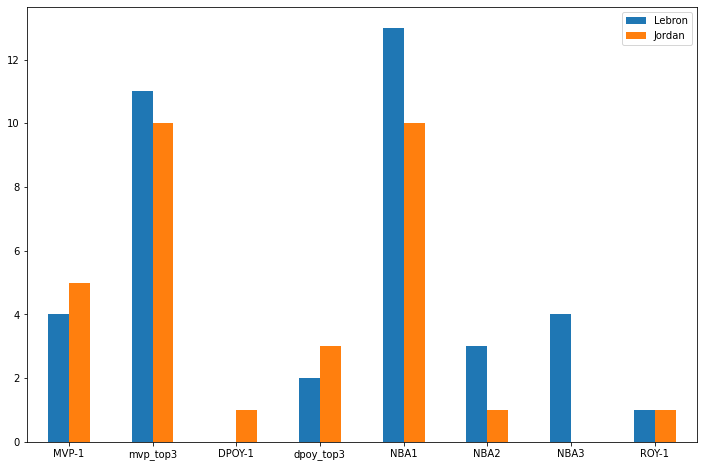

In [10]:
# Plot side by side bar chart for awards

ax = award_list.plot.bar(rot=0,figsize=(12,8))
plt.rc('font', size=13)